In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.5
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_30_51_300_0.5_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_30_51_300_0.5_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	637.3877

Best Fitness:	631.5057
Solution:	600.0000
Diff:		31.5057

[0:20:44][----------] 1.96% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	623.3185

Best Fitness:	619.1639
Solution:	600.0000
Diff:		19.1639

[0:40:03][----------] 3.92% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	634.0450

Best Fitness:	626.0795
Solution:	600.0000
Diff:		26.0795

[0:58:32][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	628.6135

Best Fitness:	624.3680
Solution:	600.0000
Diff:		24.3680

[1:17:06][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	623.8219

Best Fitness:	619.2283
Solution:	600.0000
Diff:		19.2283

[1:35:18][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	630.2811

Best Fitness:	625.1974
Solution:	600.0000
Diff:		25.1974

[1:53:57][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	625.8416

Best Fitness:	621.1479
Solution:	600.0000
Diff:		21.1479

[2:12:48][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	626.8458

Best Fitness:	619.9105
Solution:	600.0000
Diff:		19.9105

[2:31:48][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	628.3350

Best Fitness:	623.0050
Solution:	600.0000
Diff:		23.0050

[2:49:41][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	617.3298

Best Fitness:	614.0982
Solution:	600.0000
Diff:		14.0982

[3:05:53][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	620.5838

Best Fitness:	616.6594
Solution:	600.0000
Diff:		16.6594

[3:22:18][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	627.9532

Best Fitness:	622.1063
Solution:	600.0000
Diff:		22.1063

[3:38:33][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	621.4627

Best Fitness:	617.9695
Solution:	600.0000
Diff:		17.9695

[3:55:00][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	617.5860

Best Fitness:	613.6361
Solution:	600.0000
Diff:		13.6361

[4:11:27][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	632.7799

Best Fitness:	627.4940
Solution:	600.0000
Diff:		27.4940

[4:28:25][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	626.3988

Best Fitness:	620.3661
Solution:	600.0000
Diff:		20.3661

[4:44:42][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	623.3334

Best Fitness:	618.9045
Solution:	600.0000
Diff:		18.9045

[5:01:10][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	626.5996

Best Fitness:	621.5468
Solution:	600.0000
Diff:		21.5468

[5:17:08][####------] 35.29% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	628.9409

Best Fitness:	623.5418
Solution:	600.0000
Diff:		23.5418

[5:33:14][####------] 37.25% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	621.1542

Best Fitness:	617.4599
Solution:	600.0000
Diff:		17.4599

[5:48:31][####------] 39.22% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	630.1544

Best Fitness:	624.8916
Solution:	600.0000
Diff:		24.8916

[6:02:53][####------] 41.18% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	630.8339

Best Fitness:	625.1028
Solution:	600.0000
Diff:		25.1028

[6:17:13][####------] 43.14% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	632.2761

Best Fitness:	627.1620
Solution:	600.0000
Diff:		27.1620

[6:31:33][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	625.0740

Best Fitness:	619.1215
Solution:	600.0000
Diff:		19.1215

[6:46:15][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	635.7210

Best Fitness:	629.8888
Solution:	600.0000
Diff:		29.8888

[7:00:55][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	626.7047

Best Fitness:	621.7877
Solution:	600.0000
Diff:		21.7877

[7:15:41][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	634.1060

Best Fitness:	627.9895
Solution:	600.0000
Diff:		27.9895

[7:30:11][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	627.1409

Best Fitness:	621.7923
Solution:	600.0000
Diff:		21.7923

[7:44:34][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	633.6315

Best Fitness:	628.0777
Solution:	600.0000
Diff:		28.0777

[7:58:55][######----] 56.86% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	623.0831

Best Fitness:	618.1859
Solution:	600.0000
Diff:		18.1859

[8:13:11][######----] 58.82% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	624.6716

Best Fitness:	619.1319
Solution:	600.0000
Diff:		19.1319

[8:26:53][######----] 60.78% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	629.0108

Best Fitness:	624.0959
Solution:	600.0000
Diff:		24.0959

[8:39:43][######----] 62.75% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	618.7995

Best Fitness:	615.0996
Solution:	600.0000
Diff:		15.0996

[8:52:32][######----] 64.71% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	624.6975

Best Fitness:	620.5160
Solution:	600.0000
Diff:		20.5160

[9:05:11][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	634.2446

Best Fitness:	625.7078
Solution:	600.0000
Diff:		25.7078

[9:17:41][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	623.0690

Best Fitness:	617.9518
Solution:	600.0000
Diff:		17.9518

[9:30:52][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	622.8443

Best Fitness:	617.6349
Solution:	600.0000
Diff:		17.6349

[9:44:05][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	629.2785

Best Fitness:	622.7565
Solution:	600.0000
Diff:		22.7565

[9:56:59][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	636.3728

Best Fitness:	630.6687
Solution:	600.0000
Diff:		30.6687

[10:09:58][########--] 76.47% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	631.1594

Best Fitness:	625.2062
Solution:	600.0000
Diff:		25.2062

[10:22:19][########--] 78.43% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	624.6158

Best Fitness:	619.0272
Solution:	600.0000
Diff:		19.0272

[10:35:18][########--] 80.39% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	637.4313

Best Fitness:	630.4449
Solution:	600.0000
Diff:		30.4449

[10:47:38][########--] 82.35% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	631.4291

Best Fitness:	626.1270
Solution:	600.0000
Diff:		26.1270

[11:00:01][########--] 84.31% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	620.4618

Best Fitness:	615.7917
Solution:	600.0000
Diff:		15.7917

[11:11:59][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	621.4233

Best Fitness:	617.0792
Solution:	600.0000
Diff:		17.0792

[11:23:36][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	622.8544

Best Fitness:	618.5875
Solution:	600.0000
Diff:		18.5875

[11:35:05][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	624.9222

Best Fitness:	619.8679
Solution:	600.0000
Diff:		19.8679

[11:46:17][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	627.1071

Best Fitness:	622.4293
Solution:	600.0000
Diff:		22.4293

[11:57:28][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	617.9881

Best Fitness:	613.5150
Solution:	600.0000
Diff:		13.5150

[12:08:47][##########] 96.08% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	629.2243

Best Fitness:	623.1203
Solution:	600.0000
Diff:		23.1203

[12:19:19][##########] 98.04% 

Optimization ended due to max fitness evals (max = 150000.0, curr = 149700)


#Generations:	497

#FitnessEvals:	149700

Mean Fitness:	630.8419

Best Fitness:	625.1433
Solution:	600.0000
Diff:		25.1433

[12:31:10][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

12:31:10

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
492,32.02923,30.740104,27.607093,31.666644,31.185474,29.389523,30.033864,33.982577,33.763589,28.459685,...,32.503017,31.178091,29.36376,33.176335,32.130968,30.395485,26.183089,31.816061,30.545596,50
493,32.02923,30.740104,27.607093,31.666644,31.185474,29.389523,30.033864,33.982577,33.763589,28.459685,...,32.458103,31.178091,29.36376,33.174609,32.130968,30.395485,26.183089,31.816061,30.545596,50
494,32.02923,30.740104,27.607093,31.666644,31.185474,29.389523,30.033864,33.982577,33.763589,28.459685,...,32.458103,31.178091,29.36376,33.174609,32.130968,30.395485,26.183089,31.816061,30.545596,50
495,32.02923,30.740104,27.607093,31.666644,31.185474,29.389523,30.033864,33.982577,33.763589,28.459685,...,32.458103,31.178091,29.36376,33.174609,32.130968,30.395485,26.183089,31.816061,30.545596,50
496,32.02923,30.740104,27.607093,31.666644,31.185474,29.389523,30.033864,33.982577,33.763589,28.459685,...,32.458103,31.178091,29.36376,33.174609,32.130968,30.395485,26.183089,31.816061,30.090378,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 31.505671294489275

Best error for run 1: 19.163911225556262

Best error for run 2: 26.079468164277955

Best error for run 3: 24.3679672376569

Best error for run 4: 19.22827002726899

Best error for run 5: 25.197370644802845

Best error for run 6: 21.14793588586349

Best error for run 7: 19.910523860622448

Best error for run 8: 23.005041946787742

Best error for run 9: 14.098178655295214

Best error for run 10: 16.659372873877373

Best error for run 11: 22.106272338008125

Best error for run 12: 17.96952370763529

Best error for run 13: 13.636099680081657

Best error for run 14: 27.493993523801578

Best error for run 15: 20.36614930474036

Best error for run 16: 18.904501130607855

Best error for run 17: 21.54676681718456

Best error for run 18: 23.54181240405933

Best error for run 19: 17.459864105721522

Best error for run 20: 24.89160682272893

Best error for run 21: 25.102769693363484

Best error for run 22: 27.162049088716685

Best error for run 23: 19.121482050254258

Best error for run 24: 29.888797929720795

Best error for run 25: 21.78771595532362

Best error for run 26: 27.989480260144433

Best error for run 27: 21.79226415387393

Best error for run 28: 28.0776681587065

Best error for run 29: 18.185898356526423

Best error for run 30: 19.131906395770102

Best error for run 31: 24.095913020401213

Best error for run 32: 15.099617130810657

Best error for run 33: 20.516025913954763

Best error for run 34: 25.707826653187567

Best error for run 35: 17.951791485151716

Best error for run 36: 17.634922959227538

Best error for run 37: 22.756457199602096

Best error for run 38: 30.668713333213418

Best error for run 39: 25.20622549641098

Best error for run 40: 19.02723489755124

Best error for run 41: 30.44485084848361

Best error for run 42: 26.127010022809372

Best error for run 43: 15.791701196879103

Best error for run 44: 17.079193198626967

Best error for run 45: 18.587529052986156

Best error for run 46: 19.867874701756705

Best error for run 47: 22.429262841465516

Best error for run 48: 13.514986835459808

Best error for run 49: 23.12026367546366

Best error for run 50: 25.14331481032582

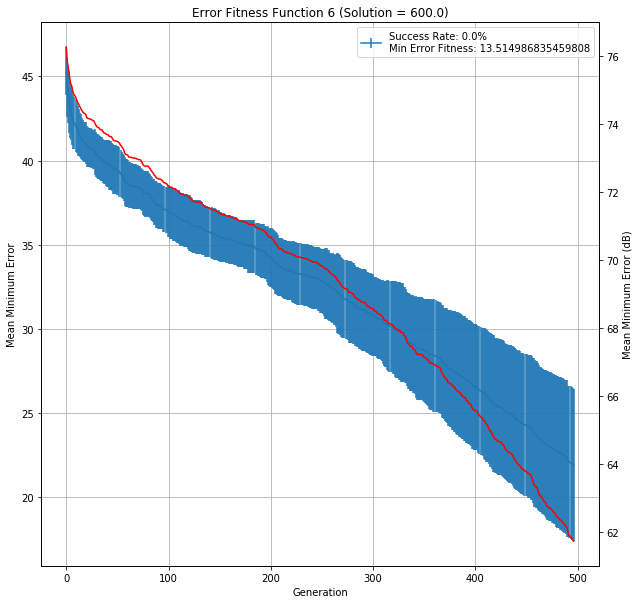

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_30_51_300_0.5_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,30,0.5,31.505671,19.163911,26.079468,24.367967,19.22827,25.197371,...,17.079193,18.587529,19.867875,22.429263,13.514987,23.120264,25.143315,21.907668,12:31:10,149700
